In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
from plots import *

%matplotlib inline

%reload_ext autoreload
%autoreload 2


c:\Users\Bruker\anaconda3\envs\4D_CT\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
rotation_rate = 20 # degrees per second
avg_frames = 12 # Number of frames to average over
frames_per_sec = 5 # seconds

exposure_time = avg_frames / frames_per_sec
print(exposure_time)

projections_per_reconstruction = np.array([4,16,32,64,128])

golden_angle = 180 * (3-np.sqrt(5))





2.4


In [286]:
# min_temporal_resolution = lambda golden_angle, exp_t, rr, projs: projs*(exp_t + (golden_angle/rr) )
scan_time = lambda golden_angle, exp_t, rr, min_proj: np.floor(np.where(360/golden_angle > min_proj, 360/ golden_angle, min_proj))*(exp_t + (golden_angle/rr) )
rotation_exposure = lambda golden_angle, exp_t, rr, min_proj: np.floor(np.where(360/golden_angle > min_proj, 360/ golden_angle, min_proj))*((golden_angle/rr) ) / scan_time(golden_angle, exp_t, rr, min_proj) * min_proj*100
projections_min = lambda golden_angle, exp_t, rr, min_proj: np.floor(np.where(360/golden_angle > min_proj, 360/golden_angle, min_proj))

measure = lambda golden_angle, exp_t, rr, min_proj, a1, a2, a3: 100/ (a1*scan_time(golden_angle, exp_t, rr, min_proj)/np.max(scan_time(golden_angle, exp_t, rr, min_proj)) + a2*rotation_exposure(golden_angle, exp_t, rr, min_proj)/np.max(rotation_exposure(golden_angle, exp_t, rr, min_proj)) + a3*projections_min(golden_angle, exp_t, rr, min_proj)/projections_min(golden_angle, exp_t, rr, min_proj).max())

metallic_means = lambda n: (180* (n + np.sqrt(n**2 +4)))%360

info_time = lambda golden_angle, exp_t, rr: 1/(exp_t + golden_angle/rr)
new_info = lambda golden_angle, exp_t, rr: golden_angle/ (360 * (exp_t + (golden_angle/rr) )) # Or time to complete a full rotation


def norm_scan_time_360(golden_angle, exp_t, rr, min_proj):
    max = np.max(scan_time(golden_angle, exp_t, rr, min_proj))
    return (np.floor(360/np.where(golden_angle > min_proj, golden_angle, min_proj))*exp_t + 360/rr)/max

def norm_rotation_exposure(golden_angle, exp_t, rr, min_proj):
    max = np.max(rotation_exposure(golden_angle, exp_t, rr, min_proj))
    return rotation_exposure(golden_angle, exp_t, rr, min_proj)/max

def norm_projections_min(golden_angle, exp_t, rr, min_proj):
    max = projections_min(golden_angle, exp_t, rr, min_proj).max()
    return projections_min(golden_angle, exp_t, rr, min_proj)/max

def measure1(golden_angle, exp_t, rr, min_proj, a1, a2, a3, onemax = True):
    time = scan_time(golden_angle, exp_t, rr, min_proj)
    rotation = rotation_exposure(golden_angle, exp_t, rr, min_proj)
    maxes = np.array([time.max(), rotation.max()])
    if onemax:
        max = np.max(maxes)
        time = time/max
        rotation = rotation/max
        return 1/(a1*time + a2*rotation)
    else:
        time = time/maxes[0]
        rotation = rotation/maxes[1]
        measure_value = 1/(a1*time + a2*rotation)
        return measure_value

def norm_info_time(golden_angle, exp_t, rr):

    info_p_time = info_time(golden_angle, exp_t, rr)

    orthogonality_measure = info_p_time *  (1-np.cos(np.deg2rad(golden_angle)))

    max = np.max(orthogonality_measure)
    return orthogonality_measure/max

def norm_new_info(golden_angle, exp_t, rr):

    angles_sec = new_info(golden_angle, exp_t, rr)
    orthogonality_measure = angles_sec * (1-np.cos(np.deg2rad(golden_angle))) 

    max = np.max(orthogonality_measure)
    return orthogonality_measure/max

[222.49223595 149.11688245 108.99922958  84.9844719   69.32966528
  58.41995766  50.41978007  44.31802522  39.51800231  35.64702489
  32.46117975  29.79451091  27.53035883  25.58441227  23.89427108
  22.41278939  21.10369835  19.93864973  18.89517142  17.9552236
  17.10415975  16.32996619  15.62269702  14.97404837  14.37703343
  13.82573175  13.31509345  12.84078514  12.39906735  11.98669621
  11.60084412  11.23903508  10.89909173  10.57909173  10.27733146
   9.99229584   9.72263291   9.46713256   9.22470832]


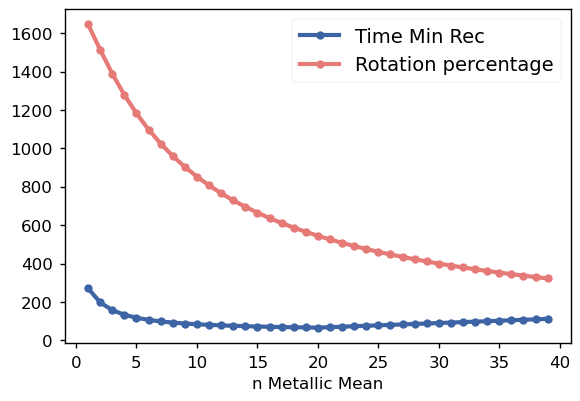

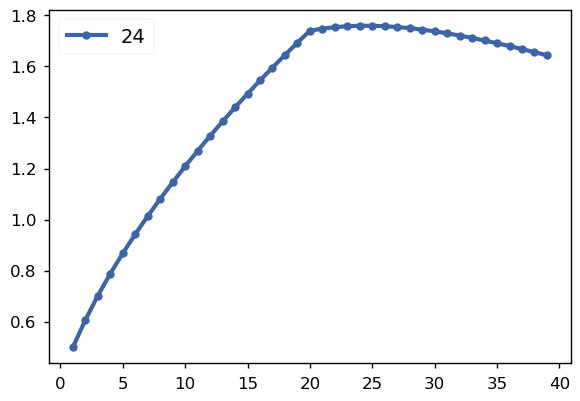

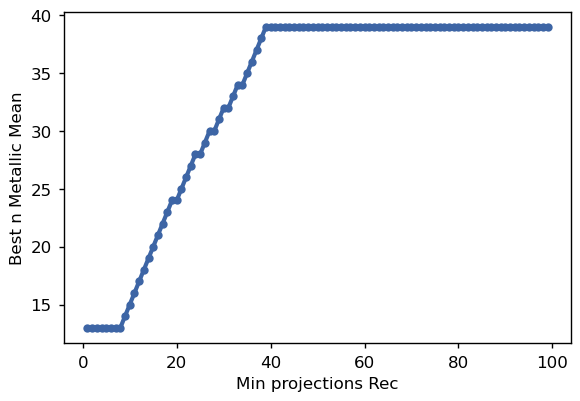

In [287]:
ns = np.array([1,5,7,8,9,10,11,12,13,20,40])
ns = np.arange(1,40,1)
angles = metallic_means(ns)

min_proj = 20
print(angles)
# angles = golden_angle * np.linspace(0.25, 2, 1000)

# for p in projections_per_reconstruction:
plt.plot(ns, scan_time(angles, exposure_time, rotation_rate, min_proj), "-o", label= "Time Min Rec")
plt.plot(ns, rotation_exposure(angles, exposure_time, rotation_rate, min_proj), "-o", label= "Rotation percentage")
# plt.plot(ns, projections_min(angles, exposure_time, rotation_rate, min_proj), "-o", label= "Min projections")
# print(scan_time(angles, exposure_time, rotation_rate))
# print(rotation_exposure(angles, exposure_time, rotation_rate))
# print(projections_min(angles, exposure_time, rotation_rate))
plt.legend()
plt.xlabel('n Metallic Mean')
# plt.ylabel('Temporal resolution (s)')
# plt.title('Time to scan 360 degrees')
# plt.xticks(angles, labels = ns, rotation=45)
# plt.ylim(0,250)
# plt.yscale("log")
plt.show()


# Optim
# optim = 1/ (scan_time(angles, exposure_time, rotation_rate) + rotation_exposure(angles, exposure_time, rotation_rate) + projections_min(angles, exposure_time, rotation_rate))
# optim = measure(angles, exposure_time, rotation_rate, min_proj, 1, 1, 0) / np.max(measure(angles, exposure_time, rotation_rate, min_proj,  1, 1, 0))
# optim1 = measure1(angles, exposure_time, rotation_rate, min_proj, 1, 1, 0, onemax = True)
# plt.plot(ns, optim1, "-o", label= f"{np.argmax(optim1)+1}")
# plt.legend()
# plt.show()

optim2 = measure1(angles, exposure_time, rotation_rate, min_proj, 1, 1, 0, onemax = False)
plt.plot(ns, optim2, "-o",  label = f"{np.argmax(optim2)+1}")
plt.legend()
plt.show()

# measure = (scan_time(angles, exposure_time, rotation_rate) * projections_min(angles, exposure_time, rotation_rate) / rotation_exposure(angles, exposure_time, rotation_rate)**2)
# plt.plot(angles, measure, "-o", label= "Measure Products")
# plt.ylim(0,20)
# plt.xticks(angles, labels = ns, rotation=45)
mins = np.arange(1,100,1)
daxes = []
for mi in mins:
    daxes.append( np.argmax(measure1(angles, exposure_time, rotation_rate, mi, 1, 1, 0, onemax = False)) + 1)
plt.plot(mins, daxes, "-o")
plt.xlabel('Min projections Rec')
plt.ylabel('Best n Metallic Mean')
plt.show()

[222.49223595 149.11688245 108.99922958  84.9844719   69.32966528
  58.41995766  50.41978007  44.31802522  39.51800231  35.64702489
  32.46117975]


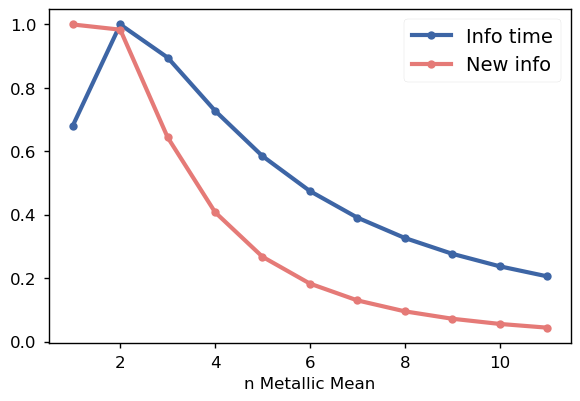

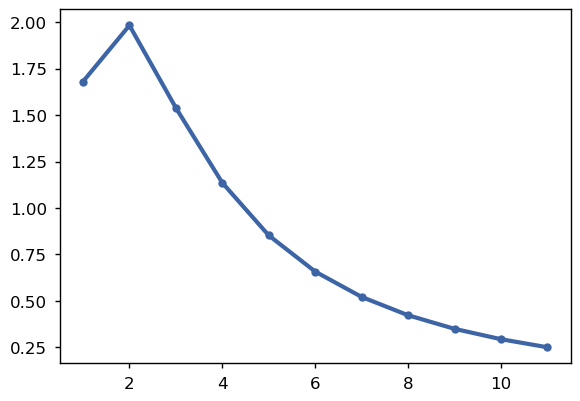

In [288]:
# Solution: Choose the absolute minimum number of projections one could imagine to be included in one projection, 
# and then choose the smallest golden angle that requires that or less projections for one full rotation.

ns = np.array([1,5,7,8,9,10,11,12,13,20,40])
ns = np.arange(1,12,1)
angles = metallic_means(ns)
print(angles)
# angles = golden_angle * np.linspace(0.25, 2, 1000)

# for p in projections_per_reconstruction:
plt.plot(ns, norm_info_time(angles, exposure_time, rotation_rate) , "-o", label= "Info time")
plt.plot(ns, norm_new_info(angles, exposure_time, rotation_rate), "-o", label= "New info")
plt.legend()
plt.xlabel('n Metallic Mean')
# plt.ylabel('Temporal resolution (s)')
# plt.title('Time to scan 360 degrees')
# plt.xticks(angles, labels = ns, rotation=45)
# plt.ylim(0,250)
# plt.yscale("log")
plt.show()

# Optim
optim = ( norm_info_time(angles, exposure_time, rotation_rate) + norm_new_info(angles, exposure_time, rotation_rate))
plt.plot(ns, optim, "-o", label= "Measure Sum")
plt.show()
